In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from pylab import barh,plot,yticks,show,grid,xlabel,figure,cla,close
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_path = '../data/train.csv'
test_path = '../data/test.csv'

## Preprocessing

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

We need to remove punctation and special characters from the text. Since we are using a BoW approach, we also need to lowercase the text.

In [5]:
def preprocess(data):
    '''
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    '''
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punct):
        for p in punct:
            text = text.replace(p, ' ')
        return text.lower()

    data = data.astype(str).apply(lambda x: clean_special_chars(x, punct))
    return data

In [6]:
X_train = preprocess(train_df['comment_text'])
y_train = np.where(train_df['target'] >= 0.5, 1, 0)
X_test = preprocess(test_df['comment_text'])

## Modelling

In [13]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_vect.fit(X_train)
tfidf_X_train = tfidf_vect.transform(X_train)
tfidf_X_test = tfidf_vect.transform(X_test)

In [15]:
chi_values, p_values = chi2(tfidf_X_train, y_train)

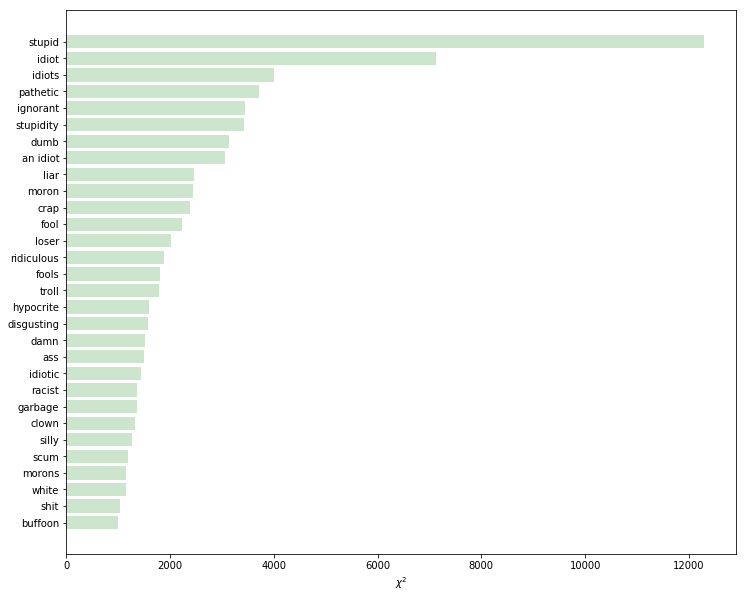

In [18]:
features = tfidf_vect.get_feature_names()

cla()   # Clear axis
close() # Close a figure window

figure(figsize=(12,10))
zipped_chi_squared = zip(features, chi_values)
sorted_chi_values = sorted(zipped_chi_squared, key=lambda x:x[1]) 
top_chi_values = list(zip(*sorted_chi_values[-30:]))

x = range(len(top_chi_values[1]))
labels = top_chi_values[0]
barh(x, list(top_chi_values)[1], align='center', alpha=.2, color='g')
yticks(x, labels)
xlabel('$\chi^2$')
show()

## Training

In [ ]:
seed = 42
train_subset, test_subset = train_test_split(train_df,  test_size=0.3, random_state=seed)
X_train = preprocess(train_subset['comment_text'])
X_train.drop_duplicates()
y_train = np.where(train_subset['target'] >= 0.5, 1, 0)
X_test = preprocess(test_subset['comment_text'])
y_test = np.where(test_subset['target'] >= 0.5, 1, 0)
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)
vect_train = vectorizer.transform(X_train)
vect_test = vectorizer.transform(X_test)

    
ch2_train = SelectKBest(chi2, k=10)
ch2_train.fit(vect_train, y_train)
X_train_chi = ch2_train.transform(vect_train)
X_test_chi = ch2_train.transform(vect_test)

clf = RandomForestClassifier()
clf.fit(X_train_chi, y_train)

pred = clf.predict(X_test_chi)

print('Accuracy: {}\n'.format(accuracy_score(pred, y_test)))

In [31]:
train_df['comment_text'].value_counts().head()

Well said.    184
No.           160
Exactly.      132
Yes.          127
Thank you.    120
Name: comment_text, dtype: int64